# Install dependencies and import:

dependencies can be install via dependencies.yml

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Step 1: Load the data

In [7]:
df_843 = pd.read_excel("data/154843.xlsx", sheet_name="Sheet1")  # Load Excel file
df_844 = pd.read_excel("data/154844.xlsx", sheet_name="Sheet1")  # Load Excel file
df_394 = pd.read_excel("data/156394.xlsx", sheet_name="Sheet1")  # Load Excel file
print(df_843.head())  # Display first 5 rows
print(df_844.head())  # Display first 5 rows
print(df_394.head())  # Display first 5 rows

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

We see that there are unrelated and personal data: index and ID, we have to delete them and convert to csv:

In [ ]:
df.drop(columns=["MSSV", "Họ và tên SV"], inplace=True)  # Delete specific column
df.to_csv("data/output.csv", index=False)  # Save as CSV without index
df.to_excel("data/output.xlsx", index=False, sheet_name="Processed")  # Save as Excel

In [ ]:
df = pd.read_csv("data/output.csv")  # Load CSV file

Let's take a look into the data:

In [ ]:
# Display the number of rows and columns
print(df.shape)
print(df.head())
print(df.info())  # Display data type of each column
print(df.describe())  # Display statistical information of numerical columns
print(df.duplicated().sum())  # Check for duplicates

(164, 10)
    KT1   KT2   KT3  KT_TB    BC  Bonus  QT_x  QT_y   CK  HP_grade
0  8.11  7.00  6.75   7.29  9.25   0.25  8.52   8.5  7.5       7.8
1  8.78  4.33  4.50   5.87  8.25   0.75  7.81   8.0  7.5       7.7
2  9.33  8.67  7.25   8.42  8.00   0.50  8.71   8.5  9.5       9.2
3  9.00  0.00  4.42   4.47  7.75   0.50  6.61   6.5  5.5       5.8
4  7.67  0.00  3.84   3.84  5.25   0.00  4.55   4.5  5.5       5.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KT1       164 non-null    float64
 1   KT2       162 non-null    float64
 2   KT3       161 non-null    float64
 3   KT_TB     164 non-null    float64
 4   BC        164 non-null    float64
 5   Bonus     164 non-null    float64
 6   QT_x      164 non-null    float64
 7   QT_y      164 non-null    float64
 8   CK        164 non-null    float64
 9   HP_grade  164 non-null    float64
dtypes: float64

The dataset is composed of 164 entries(rows) and 10 columns, all columns are being floating-point numbers, no categorical variables

No duplication is found

# Step 2: Handling missing values

First, we check for missing values

In [ ]:
print(df.isnull().sum())  # Check for missing values

KT1         0
KT2         2
KT3         3
KT_TB       0
BC          0
Bonus       0
QT_x        0
QT_y        0
CK          0
HP_grade    0
dtype: int64


It seems there are missing values in KT2 and KT3, let's fill them up with median data. Because:
- The data of KT2 and KT3 is right-skewed, so a mean data is not ideal.
- The number of missing data is low, so median do not skew the overall distribution.

Let's replace and check:

In [ ]:
df.fillna(df.median(), inplace=True)
print(df.isnull().sum())

KT1         0
KT2         0
KT3         0
KT_TB       0
BC          0
Bonus       0
QT_x        0
QT_y        0
CK          0
HP_grade    0
dtype: int64


There are no missing data anymore

# Step 3: Histograms of HP_Grade and other numbers

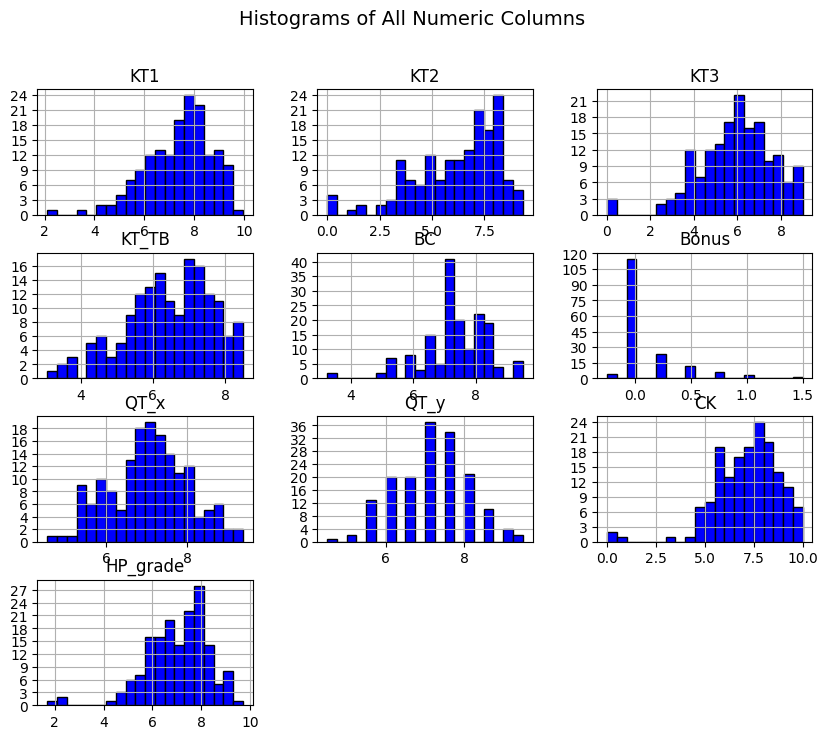

In [ ]:
# Create subplots for all numeric columns
df.select_dtypes(include=["number"]).hist(
    bins=20, figsize=(10, 8), color="blue", edgecolor="black"
)
# Ensure y-axis is whole numbers
for ax in plt.gcf().axes:
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.suptitle("Histograms of All Numeric Columns", fontsize=14)
plt.show()

We can see that:
- KT1, KT2, KT3, CK is right-skewed, so they are most likely to be heavily corellated to HP_grade linearlly.
- Most reports grades (BC) is seven.
- Bonus points are left-skewed. Most student do not have bonus points.

# Step 4: Heatmap and Matrix Correlation 

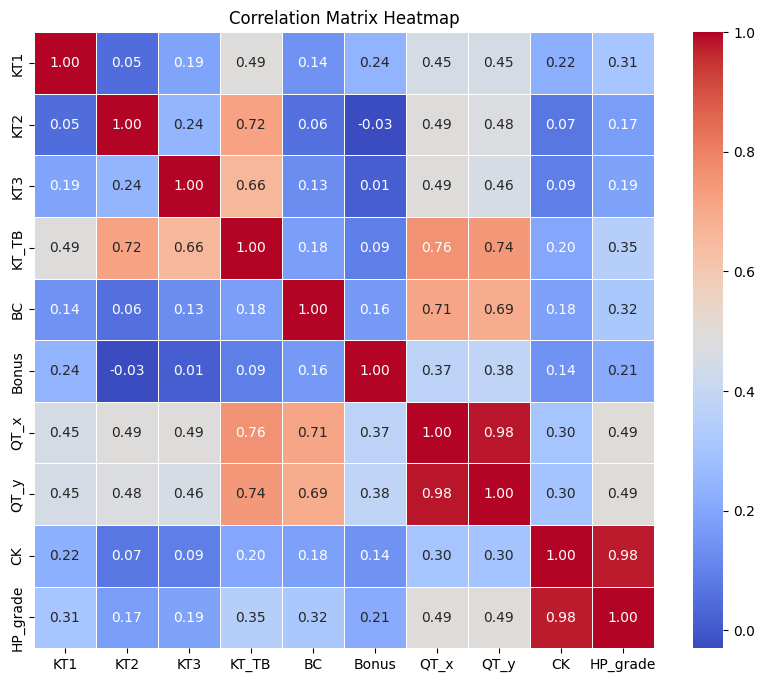

In [ ]:
# Create heatmap
corr_matrix = df.corr()
# Set figure size
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

We can see the most corellated columns are “QT_x” and “Điểm thi cuối kỳ”.

# Step 5: Boxplots

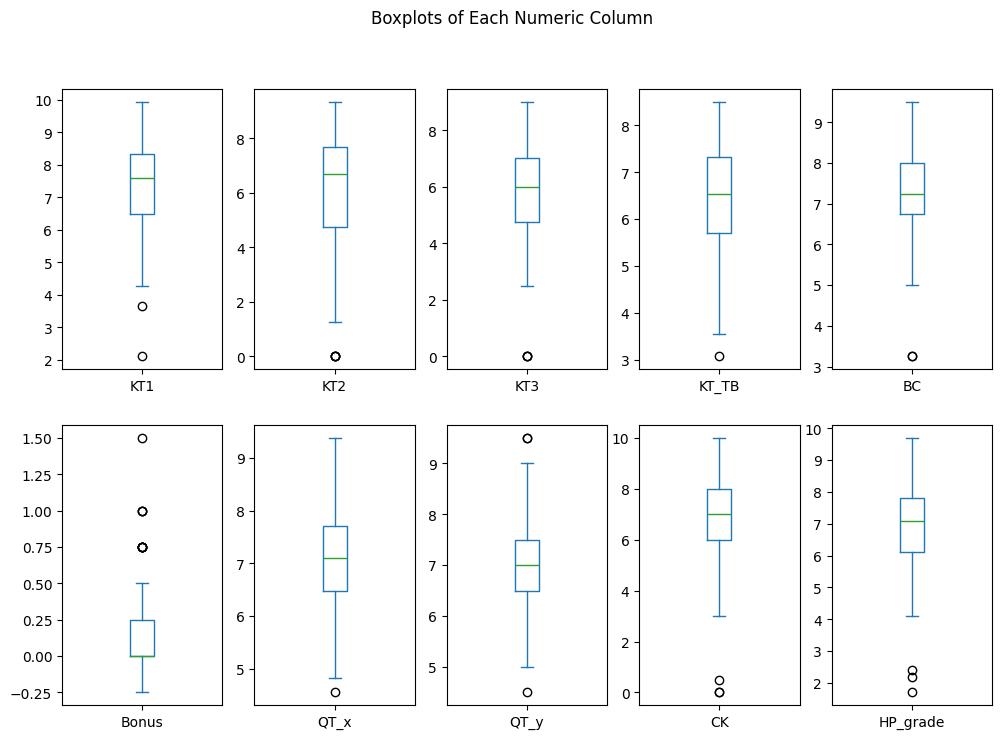

In [ ]:
# Loop through numeric columns and create individual boxplots
df.select_dtypes(include=["number"]).plot(
    kind="box",
    subplots=True,
    layout=(2, 5),
    figsize=(12, 8),
    sharex=False,
    sharey=False,
)
plt.suptitle("Boxplots of Each Numeric Column")
plt.show()

We see that:
1. Outliers:
Several variables have low-end outliers (small dots below the whiskers), especially KT1, KT2, KT3, BC, CK, and HP_grade.
The Bonus column has extreme outliers (high values >1.0).
2. Skewness:
Bonus and CK have a right-skewed distribution (whiskers are longer at the top, with outliers far above the median).
Most other features are relatively symmetric, though some (like HP_grade) have more lower-end outliers.

## Conclusion on data visualization

1. Presence of Outliers:

- Many features contain outliers, especially CK, KT2, KT3 and BC, which can impact the performance of linear regression.

1. Skewed Distributions:

- Bonus and CK are right-skewed, meaning their mean is affected by high values.
- QT_x, QT_y, and BC have a wider spread, which could introduce variance in predictions.

3. Recommendation when training model:

- Remove extreme outliers
- Normalize data


In [ ]:
#df = df[df["HP_grade"] >= 3]
#df = df[df["QT_x"] >= 3]
#df = df[df["KT3"] >= 2]
#df = df[df["KT1"] >= 3]
#df = df[df["BC"] >= 4]